# Розно К.В. 3 Вариант #

##    3.  Вторичный рынок машин
(Использовал в лабораторной фаил с решением из папки "myhelp")

## 1. Удалите столбцы, ценность которых для оценки стоимости машины низка.

In [165]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib
import seaborn as sns 
from sklearn import datasets, linear_model, preprocessing, svm 
from sklearn.preprocessing import StandardScaler, Normalizer 
 
%matplotlib inline

autolist_df = pd.read_csv('autos.csv', encoding='iso-8859-1')
print(autolist_df)

                dateCrawled                                          name  \
0       2016-03-24 11:52:17                                    Golf_3_1.6   
1       2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2       2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3       2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4       2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
...                     ...                                           ...   
371523  2016-03-14 17:48:27                    Suche_t4___vito_ab_6_sitze   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offerType  price   abtest vehicleType  yearOfRegistration  \

In [166]:
UpdAutolist = autolist_df.drop(['dateCrawled', 'offerType', 'abtest', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen'], axis='columns')
print (UpdAutolist)

                                                name  seller  price  \
0                                         Golf_3_1.6  privat    480   
1                               A5_Sportback_2.7_Tdi  privat  18300   
2                     Jeep_Grand_Cherokee_"Overland"  privat   9800   
3                                 GOLF_4_1_4__3TÜRER  privat   1500   
4                     Skoda_Fabia_1.4_TDI_PD_Classic  privat   3600   
...                                              ...     ...    ...   
371523                    Suche_t4___vito_ab_6_sitze  privat   2200   
371524         Smart_smart_leistungssteigerung_100ps  privat   1199   
371525            Volkswagen_Multivan_T4_TDI_7DC_UY2  privat   9200   
371526                        VW_Golf_Kombi_1_9l_TDI  privat   3400   
371527  BMW_M135i_vollausgestattet_NP_52.720____Euro  privat  28990   

       vehicleType  yearOfRegistration    gearbox  powerPS        model  \
0              NaN                1993    manuell        0         golf 

## 2. Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.

In [167]:
print ("Количество автомобилей до: ",autolist_df.shape[0])

Количество автомобилей до:  371528


In [168]:
Updautolistv2 = UpdAutolist.drop_duplicates(['name','price','vehicleType','yearOfRegistration'
                         ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType'
                         ,'notRepairedDamage', 'seller'])
print (Updautolistv2)

                                                name  seller  price  \
0                                         Golf_3_1.6  privat    480   
1                               A5_Sportback_2.7_Tdi  privat  18300   
2                     Jeep_Grand_Cherokee_"Overland"  privat   9800   
3                                 GOLF_4_1_4__3TÜRER  privat   1500   
4                     Skoda_Fabia_1.4_TDI_PD_Classic  privat   3600   
...                                              ...     ...    ...   
371523                    Suche_t4___vito_ab_6_sitze  privat   2200   
371524         Smart_smart_leistungssteigerung_100ps  privat   1199   
371525            Volkswagen_Multivan_T4_TDI_7DC_UY2  privat   9200   
371526                        VW_Golf_Kombi_1_9l_TDI  privat   3400   
371527  BMW_M135i_vollausgestattet_NP_52.720____Euro  privat  28990   

       vehicleType  yearOfRegistration    gearbox  powerPS        model  \
0              NaN                1993    manuell        0         golf 

In [169]:
print ("Количество автомобилей после удаления повторяющихся строк", Updautolistv2.shape[0])

Количество автомобилей после удаления повторяющихся строк 362770


In [170]:
Updautolistv3 = Updautolistv2.dropna()
print (Updautolistv3)

                                                     name  seller  price  \
3                                      GOLF_4_1_4__3TÜRER  privat   1500   
4                          Skoda_Fabia_1.4_TDI_PD_Classic  privat   3600   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...  privat    650   
6                             Peugeot_206_CC_110_Platinum  privat   2200   
7                            VW_Derby_Bj_80__Scheunenfund  privat      0   
...                                                   ...     ...    ...   
371518                          Bmw_320_D_DPF_Touring_!!!  privat   3999   
371520                                       turbo_defekt  privat   3200   
371524              Smart_smart_leistungssteigerung_100ps  privat   1199   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2  privat   9200   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  privat  28990   

       vehicleType  yearOfRegistration    gearbox  powerPS        model  \
3       klei

In [171]:
print ("Количество автомобилей после удаления повторяющихся строк и строк содержащих пропуски", Updautolistv3.shape[0])

Количество автомобилей после удаления повторяющихся строк и строк содержащих пропуски 254921


## 3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.

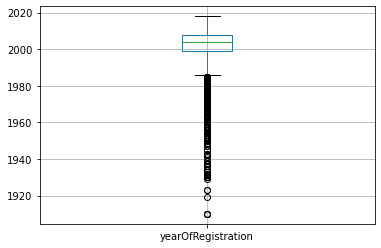

In [172]:
boxplotyear = Updautolistv3.boxplot(column=['yearOfRegistration'])

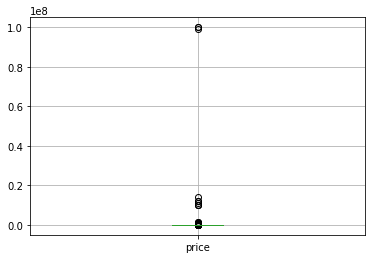

In [173]:
boxplotprice = Updautolistv3.boxplot(column=['price'])

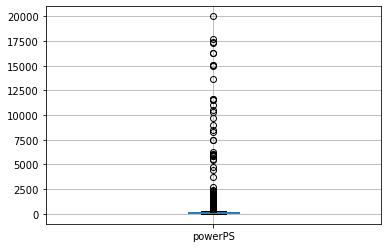

In [174]:
boxplotPS = Updautolistv3.boxplot(column=['powerPS'])

In [175]:
print ("Количество автомобилей до сортировки", Updautolistv3.shape[0])

Количество автомобилей до сортировки 254921


In [176]:
Updautolistv4 = Updautolistv3[
        (Updautolistv3.yearOfRegistration <= 2016) 
      & (Updautolistv3.yearOfRegistration >= 1950) 
      & (Updautolistv3.price >= 100) 
      & (Updautolistv3.price <= 150000) 
      & (Updautolistv3.powerPS >= 10) 
      & (Updautolistv3.powerPS <= 500)]

print (Updautolistv4)

                                                     name  seller  price  \
3                                      GOLF_4_1_4__3TÜRER  privat   1500   
4                          Skoda_Fabia_1.4_TDI_PD_Classic  privat   3600   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...  privat    650   
6                             Peugeot_206_CC_110_Platinum  privat   2200   
10                                      Mazda_3_1.6_Sport  privat   2000   
...                                                   ...     ...    ...   
371517                   Volkswagen_Golf_2.0_TDI_DPF_Team  privat   7900   
371520                                       turbo_defekt  privat   3200   
371524              Smart_smart_leistungssteigerung_100ps  privat   1199   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2  privat   9200   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  privat  28990   

       vehicleType  yearOfRegistration    gearbox  powerPS        model  \
3       klei

In [177]:
print ("Количество автомобилей после сортировки", Updautolistv4.shape[0])

Количество автомобилей после сортировки 241387


## 4. Заполнить пропущенные данные в строковых полях.

Заполним во всех 13 колонках пропуски

In [178]:
Updautolistv4['name'].fillna(value='N/D', inplace=True)
Updautolistv4['seller'].fillna(value='N/D', inplace=True)
Updautolistv4['price'].fillna(value='N/D', inplace=True)
Updautolistv4['vehicleType'].fillna(value='N/D', inplace=True)
Updautolistv4['yearOfRegistration'].fillna(value='N/D', inplace=True)
Updautolistv4['gearbox'].fillna(value='N/D', inplace=True)
Updautolistv4['powerPS'].fillna(value='N/D', inplace=True)
Updautolistv4['model'].fillna(value='N/D', inplace=True)
Updautolistv4['kilometer'].fillna(value='N/D', inplace=True)
Updautolistv4['monthOfRegistration'].fillna(value='N/D', inplace=True)
Updautolistv4['fuelType'].fillna(value='N/D', inplace=True)
Updautolistv4['brand'].fillna(value='N/D', inplace=True)
Updautolistv4['notRepairedDamage'].fillna(value='N/D', inplace=True)


c:\users\stlak\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [179]:
Updautolistv4.isnull().sum()

name                   0
seller                 0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

## 5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.

brand
volkswagen       50502
bmw              28364
mercedes_benz    24831
opel             23940
audi             23168
Name: brand, dtype: int64


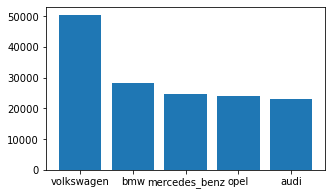

vehicleType
limousine     70970
kleinwagen    53772
kombi         49571
bus           23314
cabrio        17623
Name: vehicleType, dtype: int64


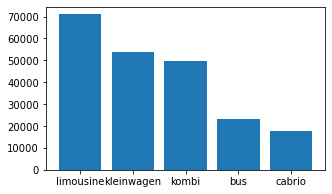

fuelType
benzin    155911
diesel     81122
lpg         3639
cng          419
hybrid       196
Name: fuelType, dtype: int64


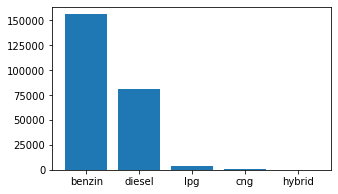

In [180]:
gistogram = ['brand', 'vehicleType', 'fuelType']
for i, c in enumerate(gistogram):
    v = Updautolistv4[c].unique()
    g = Updautolistv4.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))
    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head())
    plt.xticks(r, g.index)
    plt.show()

## 6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.

In [181]:
Updautolistv4['Carlength'] = None

<ipython-input-181-42fd450d4b13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Updautolistv4['Carlength'] = None


In [182]:
print(Updautolistv4)

                                                     name  seller  price  \
3                                      GOLF_4_1_4__3TÜRER  privat   1500   
4                          Skoda_Fabia_1.4_TDI_PD_Classic  privat   3600   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...  privat    650   
6                             Peugeot_206_CC_110_Platinum  privat   2200   
10                                      Mazda_3_1.6_Sport  privat   2000   
...                                                   ...     ...    ...   
371517                   Volkswagen_Golf_2.0_TDI_DPF_Team  privat   7900   
371520                                       turbo_defekt  privat   3200   
371524              Smart_smart_leistungssteigerung_100ps  privat   1199   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2  privat   9200   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  privat  28990   

       vehicleType  yearOfRegistration    gearbox  powerPS        model  \
3       klei

## 7. Постройте карту корреляций между признаками. Выведите также числовые значения признаков.

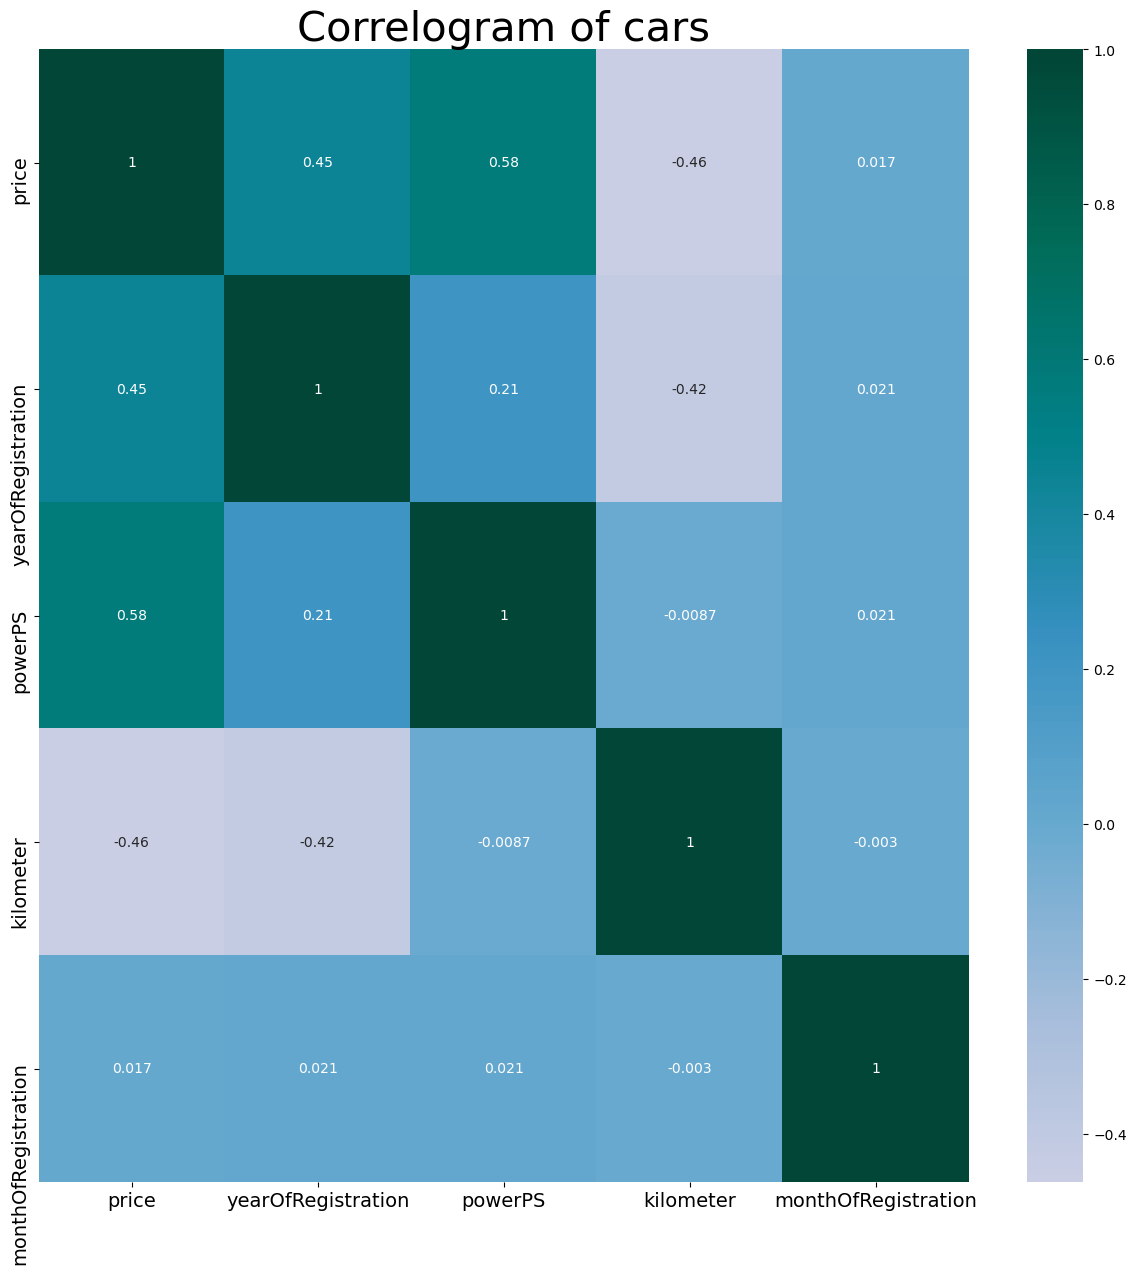

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
price,1.000000,0.451642,0.575839,-0.461691,0.016608
yearOfRegistration,0.451642,1.000000,0.208924,-0.417308,0.021489
powerPS,0.575839,0.208924,1.000000,-0.008716,0.021354
kilometer,-0.461691,-0.417308,-0.008716,1.000000,-0.002982
monthOfRegistration,0.016608,0.021489,0.021354,-0.002982,1.000000


In [183]:
# Взял из https://habr.com/ru/post/468295/
plt.figure(figsize=(15,15), dpi= 100)
sns.heatmap(Updautolistv4.corr(), xticklabels=Updautolistv4.corr().columns, yticklabels=Updautolistv4.corr().columns, cmap='PuBuGn', center=0, annot=True)


plt.title('Correlogram of cars', fontsize=30)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Updautolistv4.corr()

## 9. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [184]:
Updautolistv4['brief info'] = Updautolistv4['brand'] + " " + Updautolistv4['model']
print (Updautolistv4)

                                                     name  seller  price  \
3                                      GOLF_4_1_4__3TÜRER  privat   1500   
4                          Skoda_Fabia_1.4_TDI_PD_Classic  privat   3600   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...  privat    650   
6                             Peugeot_206_CC_110_Platinum  privat   2200   
10                                      Mazda_3_1.6_Sport  privat   2000   
...                                                   ...     ...    ...   
371517                   Volkswagen_Golf_2.0_TDI_DPF_Team  privat   7900   
371520                                       turbo_defekt  privat   3200   
371524              Smart_smart_leistungssteigerung_100ps  privat   1199   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2  privat   9200   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  privat  28990   

       vehicleType  yearOfRegistration    gearbox  powerPS        model  \
3       klei

<ipython-input-184-42aed08a2ca0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Updautolistv4['brief info'] = Updautolistv4['brand'] + " " + Updautolistv4['model']


## 8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков.


In [185]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder

In [186]:
label_encoder = LabelEncoder()
vehicleCoder = pd.Series(label_encoder.fit_transform(Updautolistv4['vehicleType']))
coefficientpearson = pearsonr(Updautolistv4['price'],vehicleCoder)
coefficientspearman = spearmanr(Updautolistv4['price'],vehicleCoder)

In [187]:
print("Коэффициент корреляции Пирсона: ",coefficientpearson)


Коэффициент корреляции Пирсона:  (-0.010069549164327769, 7.521703626189887e-07)


In [188]:
print("Коэффициент корреляции Спирмена: ",coefficientspearman)


Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=0.03672933039006128, pvalue=7.672166486775973e-73)


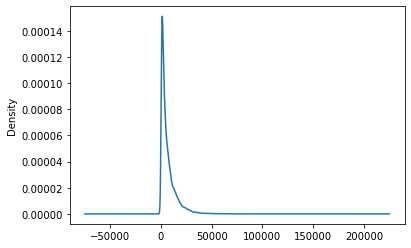

In [189]:
sPrice = pd.Series(Updautolistv4['price'])
sPrice.plot.kde()

In [190]:
if (coefficientspearman[1]<0.05):
    print("p-value удовлетворительное")
else:
    print("p-value неудовлетворительное")

p-value удовлетворительное


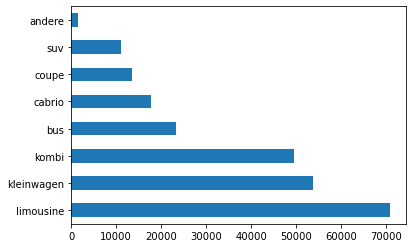

In [191]:
Updautolistv4['vehicleType'].value_counts().plot.barh()